# Análisis Sísmico

In [1]:
#Importar las librerías necesarias
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy
sys.path.append(os.getcwd())
from utils import etabs_utils as etb
from utils import sismo_utils as sis
from utils import notebook_utils as ntb
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display 

In [2]:
_,SapModel = etb.connect_to_etabs()

In [3]:
sismo = ntb.Sismo()

# Parámetros de Sitio

## Zonificación
![Factor de Zonifiación](./images/factor_zona.png)

## Factor de Suelo
![Factor de Suelo](./images/factor_suelo.png)


## Periodos del suelo
![Periodos del Suelo](./images/periodos_suelo.png)

## Sistema Estructural
![Sistema Estructural](./images/sistemas_estructurales.png)

## Factor de Amplificación sísmica
![Factor de Amplificacion Sísmica](./images/amplificacion_sismica.png)

## Factor de Importancia
![Factor de Importancia](./images/factor_importancia.png)

In [4]:
sismo.ubicacion()

In [5]:
sismo.parametros_e30()

# Irregularidades

In [6]:
sismo.irregularidades_e30()

# Parámetros Sísmicos

In [7]:
sismo.show_params()


 Parámetros de sitio:
Factor de zona: 
    Z=0.45
Factor de Importancia: 
    U=1.00
Factor de Suelo: 
    S=1.05
Periodos del Suelo: 
    Tp=0.60
    Tl=2.00
Factor Básico de Reducción:
    Rox=7.00
    Roy=7.00
Irregularidad en planta:
    Ip=1.00
Irregularidad en altura:
    Ia=1.00
Factor de Reducción:
    Rx=7.00
    Ry=7.00



# Cargas Sísmicas

In [13]:
sismo.select_loads(SapModel)

# Selección del Piso Base

In [20]:
sismo.select_base_story(SapModel)

Dropdown(description='Piso Base', options=('Story1', 'Story2', 'Story3', 'Story4', 'Story5', 'Story6'), style=…

# Periodos Modales

In [21]:
sismo.ana_modal(SapModel,report=True)


Análisis Modal:
Masa Participativa X: 1.00
Masa Participativa Y: 1.00
Periodo y Masa Participativa X: Tx=0.584, Ux=0.757
Periodo y Masa Participativa Y: Ty=0.289, Uy=0.716


,Mode,Period,UX,UY,RZ,SumUX,SumUY,SumRZ
0,1,0.584,0.75660,0.006700,0.0144,0.7566,0.0067,0.0144
1,2,0.33,0.01520,0.000000,0.7225,0.7717,0.0067,0.7368
2,3,0.289,0.00680,0.716100,0.0002,0.7785,0.7228,0.737
3,4,0.168,0.12330,0.001500,0.0032,0.9018,0.7243,0.7402
4,5,0.084,0.00050,0.000100,0.1759,0.9023,0.7244,0.9162
5,6,0.081,0.05230,0.000400,0.0002,0.9546,0.7248,0.9164
6,7,0.069,0.00130,0.189800,0.0001,0.9559,0.9146,0.9165
7,8,0.048,0.02510,0.000200,0.001,0.9811,0.9147,0.9175
8,9,0.04,0.00120,0.000100,0.0545,0.9823,0.9148,0.972
9,10,0.033,0.01160,0.000800,0.0002,0.9938,0.9156,0.9722


# Análisis Estático

In [22]:
sismo.sismo_estatico(SapModel,report=True) 

Factor de Reduccion con Irregularidades en X: R=7.0
Factor de Reduccion con Irregularidades en Y: R=7.0
C en X: 2.50
C en Y: 2.50

Coeficiente de sismo estático X: 0.169
Coeficiente de sismo estático Y: 0.169
Exponente de altura X: 1.04
Exponente de altura Y: 1.00
Fuerza Cortante en X: 2047.44
Fuerza Cortante en Y: 2047.44


,Story,Weight,Height,H^kx,H^ky,PxHx,PxHy,ax,ay,vx,vy
0,Story6,1839.849,15800.0,23713.77,15800.0,4.362976e+07,2.906961e+07,0.266,0.392,543.722,801.959
1,Story5,2066.484,13200.0,19662.47,13200.0,4.063218e+07,2.727759e+07,0.247,0.365,506.366,746.860
2,Story4,2051.734,10600.0,15644.75,10600.0,3.209887e+07,2.174838e+07,0.195,0.288,400.022,590.009
3,Story3,2051.734,8000.0,11668.63,8000.0,2.394092e+07,1.641387e+07,0.146,0.215,298.356,440.058
4,Story2,2051.734,5400.0,7747.37,5400.0,1.589554e+07,1.107936e+07,0.097,0.143,198.093,292.176
5,Story1,2071.434,2800.0,3907.86,2800.0,8.094869e+06,5.800016e+06,0.049,0.073,100.880,148.792


# Espectro dinámico

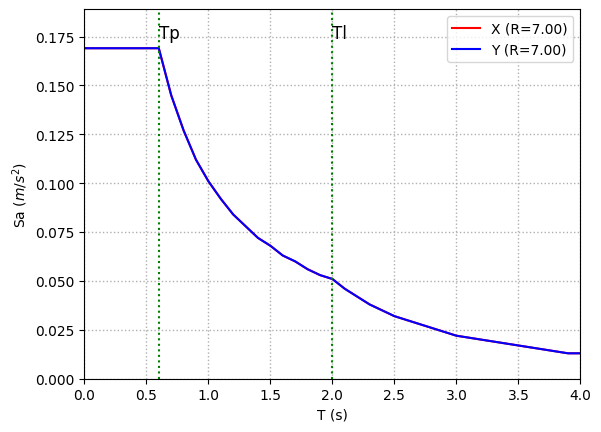

In [23]:
sismo.dinamic_spectrum(report=True)

# Fuerza Cortante Mínima

In [24]:
sismo.min_shear(SapModel,story=sismo.base_story,report=True)

,X,Y
V din (Ton),263.877900,258.030300
V est (Ton),-276.660400,-276.660400
% min,80,80
%,95.380000,93.270000
F.E.,1,1


# Discotinuidad por diafragma

In [25]:
sismo.discontinuidad_diafragma()

# Esquinas Entrantes

In [26]:
sismo.esquinas_entrantes()

## Revisión por Piso Blando

In [27]:
sismo.piso_blando(SapModel,report=True)

Dropdown(description='Filtro', options=('SY', 'SDY Max', 'SX', 'SDX Max', 'sin filtro'), style=DescriptionStyl…

,Story,OutputCase,UX,UY,ΔUX,ΔUY,VX,VY,lat_rig(k),0.7_prev_k,0.8k_prom,is_reg
0,Story6,SY,0.002477,0.00867,0.000309,0.001609,0,-72.2012,44873.337477,0.000000,0.000000,Regular
1,Story5,SY,0.002168,0.007061,0.000400,0.001719,0,-139.9515,81414.485166,31411.336234,0.000000,Regular
2,Story4,SY,0.001768,0.005342,0.000482,0.001732,0,-193.9688,111991.224018,56990.139616,0.000000,Regular
3,Story3,SY,0.001286,0.00361,0.000526,0.001610,0,-234.7365,145799.068323,78393.856813,63541.079110,Regular
4,Story2,SY,0.00076,0.002,0.000485,0.001287,0,-262.2547,203772.105672,102059.347826,90454.607335,Regular
5,Story1,SY,0.000275,0.000713,0.000275,0.000713,0,-276.6604,388023.001403,142640.473970,123083.306137,Regular


## Revisión por Irregularidad de Masa

In [28]:
sismo.irregularidad_masa(SapModel,report=True)

,Story,Mass,1.5 Mass,story_type,is_regular
0,Story6,19.13240,,Azotea,Regular
1,Story5,21.48916,32.23374,Piso,Regular
2,Story4,21.33578,32.00367,Piso,Regular
3,Story3,21.33578,32.00367,Piso,Regular
4,Story2,21.33578,32.00367,Piso,Regular
5,Story1,21.54064,32.31096,Piso,Regular
6,Base,2.39000,,Sotano,Regular


## Revisión de torsión

In [29]:
sismo.irregularidad_torsion(SapModel,report=True)

Dropdown(description='Filtro', options=('SX ', 'SY ', 'SDY Max', 'SDX Max', 'sin filtro'), style=DescriptionSt…

,Story,OutputCase,Direction,Max Drift,Avg Drift,Ratio,Height,Drifts,Drift < Dmax/2,tor_reg
0,Story6,SX,X,0.003992,0.003801,1.05,2.6,0.008061,False,Regular
7,Story5,SX,X,0.005215,0.004931,1.058,2.6,0.010530,False,Regular
14,Story4,SX,X,0.006379,0.006009,1.062,2.6,0.012881,False,Regular
21,Story3,SX,X,0.006982,0.006559,1.065,2.6,0.014098,False,Regular
28,Story2,SX,X,0.00646,0.006051,1.068,2.6,0.013044,False,Regular
35,Story1,SX,X,0.003638,0.003385,1.075,2.8,0.006821,False,Regular


## Derivas

Dropdown(description='Filtro', options=('SX ', 'SY ', 'SDY Max', 'SDX Max', 'sin filtro'), style=DescriptionSt…

,Story,OutputCase,Direction,Height,Drifts,Drift_Check
0,Story6,SX,X,2.6,0.008061,No Cumple
7,Story5,SX,X,2.6,0.010530,No Cumple
14,Story4,SX,X,2.6,0.012881,No Cumple
21,Story3,SX,X,2.6,0.014098,No Cumple
28,Story2,SX,X,2.6,0.013044,No Cumple
35,Story1,SX,X,2.8,0.006821,Cumple


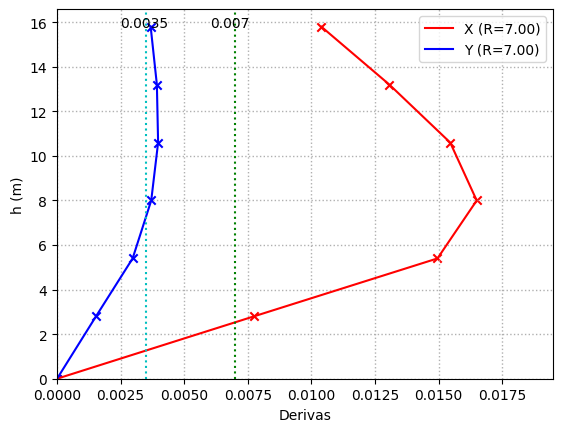

In [30]:
sismo.derivas(SapModel,report=True)

# Desplazamientos Laterales

Dropdown(description='Filtro', options=('SX ', 'SY ', 'SDY Max', 'SDX Max', 'sin filtro'), style=DescriptionSt…

,Story,OutputCase,Direction,Maximum,Height
0,Story6,SX,X,0.032529,2.6
7,Story5,SX,X,0.028553,2.6
14,Story4,SX,X,0.023361,2.6
21,Story3,SX,X,0.017012,2.6
28,Story2,SX,X,0.010065,2.6
35,Story1,SX,X,0.003638,2.8


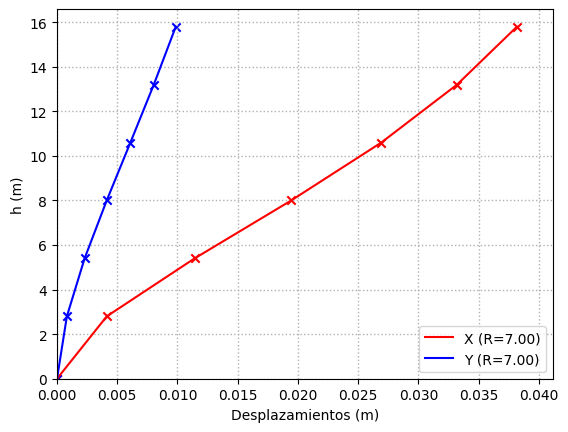

In [31]:
sismo.desplazamientos(SapModel,report=True)

# Centro de Masas e Inercias

In [32]:
#Activar calculate Diaphragm Center of Rigidity en Set Load Cases to Run
sismo.centro_masa_inercia(SapModel,report=True)

,Story,XCCM,XCR,YCCM,YCR,DifX,DifY
0,Story1,5.9798,5.8081,9.7131,12.2213,0.1717,-2.5082
1,Story2,5.9656,5.7843,9.6981,12.256,0.1813,-2.5579
2,Story3,5.9656,5.7741,9.6981,12.0645,0.1915,-2.3664
3,Story4,5.9656,5.7661,9.6981,11.8552,0.1995,-2.1571
4,Story5,5.9931,5.7591,9.6885,11.6724,0.2340,-1.9839
5,Story6,5.9557,5.7531,9.681,11.539,0.2026,-1.8580


In [34]:
sismo.tables.drift_table

,Story,OutputCase,Direction,Height,Drifts,Drift_Check
0,Story6,SX,X,2.6,0.008061,No Cumple
1,Story6,SY,X,2.6,0.001242,Cumple
2,Story6,SY,Y,2.6,0.003681,Cumple
3,Story6,SDY Max,X,2.6,0.001460,Cumple
4,Story6,SDY Max,Y,2.6,0.003469,Cumple
5,Story6,SDX Max,X,2.6,0.010393,No Cumple
6,Story6,SDX Max,Y,2.6,0.002653,Cumple
7,Story5,SX,X,2.6,0.010530,No Cumple
8,Story5,SY,X,2.6,0.001482,Cumple
9,Story5,SY,Y,2.6,0.003925,Cumple


# Generación de reporte

In [24]:
    sismo.generate_memoria()



Iniciando la generación del documento en formato .pdf y .tex...
El documento ha sido generado con éxito


<Figure size 576x432 with 0 Axes>